In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
! pip install geopandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [3]:
import geopandas as gpd

In [4]:
! pip install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [5]:
!pip install folium pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


In [7]:
import matplotlib.pyplot as plt
import folium

# Crossbill and Squirrel observations in Scotland

The Scottish Crossbill *(Loxia scotica)* is a finch that inhabits the Scots pine forests in the Scottish Highlands. The crossbill is the only endemic bird to the UK, meaning it's found nowhere else in the world. 

The beak of Crossbills' are adapted for taking seeds from the cones of pine, spruce and larch. They love the seeds of the Scots pine, and forests are managed to make sure the trees are producing plentiful cones. They spend most of their time at the top of pine trees. 
</br>
<div>
<img src="images/crossbill.jpeg" width="500"/>
</div>

</br>

The population has estimated to be at around 1500 adult birds, however they do face the problem of nest predation from an equally cute and equally red furry fiend. 

</br>

<div>
<img src="images/squirrel.jpeg" width="500"/>
</div>

### The red squirrel *(Sciurus vulgaris)*

Whilst we don't often see red squirrels in the UK anymore, especially in England, they are actually the native species. The grey squirrel were introduced to the UK in the 1800s, and have pushed the red squirrel population north. It is thought that without conservation support, red squirrels could become extinct in as little as 10 years. 

## Crossbill distribution changes from 19XX to 20XX

Ting's data goes here

### Squirrel distribution 

In [8]:
sdata = pd.read_csv('data/squirrel.csv')

In [9]:
sdata.head()

species stateProvince occurrenceStatus  individualCount  \
0  Sciurus carolinensis      Scotland          PRESENT              1.0   
1      Sciurus vulgaris      Scotland          PRESENT              1.0   
2  Sciurus carolinensis      Scotland          PRESENT              1.0   
3      Sciurus vulgaris      Scotland          PRESENT              1.0   
4  Sciurus carolinensis      Scotland          PRESENT              1.0   

                       publishingOrgKey  decimalLatitude  decimalLongitude  \
0  d98506d8-5ab1-4a26-9ef1-766bdb54304f        57.040759         -2.454805   
1  d98506d8-5ab1-4a26-9ef1-766bdb54304f        55.186290         -3.045949   
2  d98506d8-5ab1-4a26-9ef1-766bdb54304f        57.132417         -2.175075   
3  d98506d8-5ab1-4a26-9ef1-766bdb54304f        56.781948         -3.864949   
4  d98506d8-5ab1-4a26-9ef1-766bdb54304f        55.517059         -2.551879   

   coordinateUncertaintyInMeters         eventDate  day  month  year  
0                          707.1  22/02/2008 00:00   22      2  2008  
1                          707.1  07/05/2014 00:00    7      5  2014  
2                            0.7  16/03/2019 00:00   16      3  2019  
3                           70.7  19/11/2013 00:00   19     11  2013  
4                           70.7  18/05/2018 00:00   18      5  2018

In [10]:
sdata.dtypes

species                           object
stateProvince                     object
occurrenceStatus                  object
individualCount                  float64
publishingOrgKey                  object
decimalLatitude                  float64
decimalLongitude                 float64
coordinateUncertaintyInMeters    float64
eventDate                         object
day                                int64
month                              int64
year                               int64
dtype: object

In [11]:
# I want o change the eventDate to date time
sdata['date_parsed'] = pd.to_datetime(sdata['eventDate'], format="%d/%m/%Y %H:%M")

In [12]:
sdata = sdata.drop('eventDate', axis =1 )

In [13]:
sdata.date_parsed.min()

Timestamp('1905-06-19 00:00:00')

In [14]:
sdata.date_parsed.max()

Timestamp('2021-08-25 00:00:00')

So we have data from 1905 to 2021... so I'm going to add a year column

In [15]:
sdata['year'] = sdata['date_parsed'].dt.year

In [16]:
sdata.decimalLatitude.mean()

56.27734897798272

In [17]:
sdata.decimalLongitude.mean()

-3.3838809388889963

In [18]:
sdata 

species stateProvince occurrenceStatus  individualCount  \
0       Sciurus carolinensis      Scotland          PRESENT              1.0   
1           Sciurus vulgaris      Scotland          PRESENT              1.0   
2       Sciurus carolinensis      Scotland          PRESENT              1.0   
3           Sciurus vulgaris      Scotland          PRESENT              1.0   
4       Sciurus carolinensis      Scotland          PRESENT              1.0   
...                      ...           ...              ...              ...   
154828      Sciurus vulgaris      Scotland          PRESENT              1.0   
154829  Sciurus carolinensis      Scotland          PRESENT              1.0   
154830      Sciurus vulgaris      Scotland          PRESENT              4.0   
154831      Sciurus vulgaris      Scotland          PRESENT              1.0   
154832  Sciurus carolinensis      Scotland          PRESENT              1.0   

                            publishingOrgKey  decimalLatitude  \
0       d98506d8-5ab1-4a26-9ef1-766bdb54304f        57.040759   
1       d98506d8-5ab1-4a26-9ef1-766bdb54304f        55.186290   
2       d98506d8-5ab1-4a26-9ef1-766bdb54304f        57.132417   
3       d98506d8-5ab1-4a26-9ef1-766bdb54304f        56.781948   
4       d98506d8-5ab1-4a26-9ef1-766bdb54304f        55.517059   
...                                      ...              ...   
154828  d98506d8-5ab1-4a26-9ef1-766bdb54304f        55.026373   
154829  d98506d8-5ab1-4a26-9ef1-766bdb54304f        55.367986   
154830  d98506d8-5ab1-4a26-9ef1-766bdb54304f        57.050890   
154831  d98506d8-5ab1-4a26-9ef1-766bdb54304f        56.396869   
154832  d98506d8-5ab1-4a26-9ef1-766bdb54304f        55.858752   

        decimalLongitude  coordinateUncertaintyInMeters  day  month  year  \
0              -2.454805                          707.1   22      2  2008   
1              -3.045949                          707.1    7      5  2014   
2              -2.175075                            0.7   16      3  2019   
3              -3.864949                           70.7   19     11  2013   
4              -2.551879                           70.7   18      5  2018   
...                  ...                            ...  ...    ...   ...   
154828         -3.683184                          707.1    7     11  2013   
154829         -2.782517                          707.1    2      2  2018   
154830         -2.506852                           70.7   23      9  2019   
154831         -4.149000                            0.7    1      4  2012   
154832         -3.207734                          707.1    4      7  2014   

       date_parsed  
0       2008-02-22  
1       2014-05-07  
2       2019-03-16  
3       2013-11-19  
4       2018-05-18  
...            ...  
154828  2013-11-07  
154829  2018-02-02  
154830  2019-09-23  
154831  2012-04-01  
154832  2014-07-04  

[154833 rows x 12 columns]

In [19]:
from folium.plugins import HeatMap

loc = "Squirrel Observations"

m = folium.Map(
    location = [sdata['decimalLatitude'].median(), sdata['decimalLongitude'].median()], #latitude, longitude of map's center
    tiles = "Stamen Terrain", #layout. Options include "OpenStreetMap", "Stamen Terrain/Tone/Watercolor", "Cloudmade (must pass API key)"
    zoom_start = 6) #default is 10

m.add_child(
    HeatMap(
        sdata[['decimalLatitude', 'decimalLongitude']],
        radius = 7,
        min_opacity = 0.2,
        blur = 5
    )
) 

So unlike the birds, we can see that squirrels are pretty prolific across scotland, with a particularly high intensity area in the east.  

In [20]:
gsquir = sdata[sdata['species'] == 'Sciurus carolinensis' ]
rsquir = pd.DataFrame(sdata[sdata['species'] == 'Sciurus vulgaris' ])

In [21]:
g = folium.Map(
    location = [gsquir['decimalLatitude'].median(), gsquir['decimalLongitude'].median()], #latitude, longitude of map's center
    tiles = "Stamen Terrain", #layout. Options include "OpenStreetMap", "Stamen Terrain/Tone/Watercolor", "Cloudmade (must pass API key)"
    zoom_start = 6) #default is 10

g.add_child(
    HeatMap(
        gsquir[['decimalLatitude', 'decimalLongitude']],
        radius = 7,
        min_opacity = 0.2,
        blur = 5
    )
) 

In [22]:
r = folium.Map(
    location = [rsquir['decimalLatitude'].median(), rsquir['decimalLongitude'].median()], #latitude, longitude of map's center
    tiles = "Stamen Terrain", #layout. Options include "OpenStreetMap", "Stamen Terrain/Tone/Watercolor", "Cloudmade (must pass API key)"
    zoom_start = 6) #default is 10

r.add_child(
    HeatMap(
        rsquir[['decimalLatitude', 'decimalLongitude']],
        radius = 7,
        min_opacity = 0.2,
        blur = 5
    )
) 

With the data separated, we can see that whilst red & grey squirrels observe much of the same area, there is an increase level of observations in the east, and the red squirrels seem to inhabit further north too. 

In [23]:
import xarray as xr

In [24]:
rsquir.head()

species stateProvince occurrenceStatus  individualCount  \
1   Sciurus vulgaris      Scotland          PRESENT              1.0   
3   Sciurus vulgaris      Scotland          PRESENT              1.0   
5   Sciurus vulgaris      Scotland          PRESENT              1.0   
9   Sciurus vulgaris      Scotland          PRESENT              1.0   
12  Sciurus vulgaris      Scotland          PRESENT              1.0   

                        publishingOrgKey  decimalLatitude  decimalLongitude  \
1   d98506d8-5ab1-4a26-9ef1-766bdb54304f        55.186290         -3.045949   
3   d98506d8-5ab1-4a26-9ef1-766bdb54304f        56.781948         -3.864949   
5   d98506d8-5ab1-4a26-9ef1-766bdb54304f        55.055820         -4.983296   
9   d98506d8-5ab1-4a26-9ef1-766bdb54304f        56.525425         -5.309333   
12  d98506d8-5ab1-4a26-9ef1-766bdb54304f        57.414643         -2.213893   

    coordinateUncertaintyInMeters  day  month  year date_parsed  
1                           707.1    7      5  2014  2014-05-07  
3                            70.7   19     11  2013  2013-11-19  
5                            70.7    4     10  2008  2008-10-04  
9                            70.7    4     11  2020  2020-11-04  
12                           70.7   20      5  2009  2009-05-20

In [25]:
rsquir.dtypes

species                                  object
stateProvince                            object
occurrenceStatus                         object
individualCount                         float64
publishingOrgKey                         object
decimalLatitude                         float64
decimalLongitude                        float64
coordinateUncertaintyInMeters           float64
day                                       int64
month                                     int64
year                                      int64
date_parsed                      datetime64[ns]
dtype: object

In [26]:
rsquir['year'] = rsquir['year'].astype(str)

In [27]:
rsquir['lenDate'] = rsquir['year'].apply(len)
rsquir[rsquir['lenDate'] > 4]

Empty DataFrame
Columns: [species, stateProvince, occurrenceStatus, individualCount, publishingOrgKey, decimalLatitude, decimalLongitude, coordinateUncertaintyInMeters, day, month, year, date_parsed, lenDate]
Index: []

In [28]:
rsquir['year_parsed'] = pd.to_datetime(rsquir['year'], format = '%Y')

In [29]:
rsquir.head()

species stateProvince occurrenceStatus  individualCount  \
1   Sciurus vulgaris      Scotland          PRESENT              1.0   
3   Sciurus vulgaris      Scotland          PRESENT              1.0   
5   Sciurus vulgaris      Scotland          PRESENT              1.0   
9   Sciurus vulgaris      Scotland          PRESENT              1.0   
12  Sciurus vulgaris      Scotland          PRESENT              1.0   

                        publishingOrgKey  decimalLatitude  decimalLongitude  \
1   d98506d8-5ab1-4a26-9ef1-766bdb54304f        55.186290         -3.045949   
3   d98506d8-5ab1-4a26-9ef1-766bdb54304f        56.781948         -3.864949   
5   d98506d8-5ab1-4a26-9ef1-766bdb54304f        55.055820         -4.983296   
9   d98506d8-5ab1-4a26-9ef1-766bdb54304f        56.525425         -5.309333   
12  d98506d8-5ab1-4a26-9ef1-766bdb54304f        57.414643         -2.213893   

    coordinateUncertaintyInMeters  day  month  year date_parsed  lenDate  \
1                           707.1    7      5  2014  2014-05-07        4   
3                            70.7   19     11  2013  2013-11-19        4   
5                            70.7    4     10  2008  2008-10-04        4   
9                            70.7    4     11  2020  2020-11-04        4   
12                           70.7   20      5  2009  2009-05-20        4   

   year_parsed  
1   2014-01-01  
3   2013-01-01  
5   2008-01-01  
9   2020-01-01  
12  2009-01-01

In [30]:
from datetime import datetime

In [90]:
rsquir2 = pd.DataFrame(rsquir.groupby('year_parsed')['individualCount'].sum())
rsquir = rsquir[rsquir["year_parsed"].dt.year >= 1980]
rsquir = rsquir[rsquir["year_parsed"].dt.year < 2021]

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
rsquir['year_parsed'] = rsquir['year_parsed'].dt.strftime('%Y')

In [91]:
import seaborn as sns
import matplotlib as plt

In [92]:
rsquir.head()


species stateProvince occurrenceStatus  individualCount  \
1   Sciurus vulgaris      Scotland          PRESENT              1.0   
3   Sciurus vulgaris      Scotland          PRESENT              1.0   
5   Sciurus vulgaris      Scotland          PRESENT              1.0   
9   Sciurus vulgaris      Scotland          PRESENT              1.0   
12  Sciurus vulgaris      Scotland          PRESENT              1.0   

                        publishingOrgKey  decimalLatitude  decimalLongitude  \
1   d98506d8-5ab1-4a26-9ef1-766bdb54304f        55.186290         -3.045949   
3   d98506d8-5ab1-4a26-9ef1-766bdb54304f        56.781948         -3.864949   
5   d98506d8-5ab1-4a26-9ef1-766bdb54304f        55.055820         -4.983296   
9   d98506d8-5ab1-4a26-9ef1-766bdb54304f        56.525425         -5.309333   
12  d98506d8-5ab1-4a26-9ef1-766bdb54304f        57.414643         -2.213893   

    coordinateUncertaintyInMeters  day  month  year date_parsed  lenDate  \
1                           707.1    7      5  2014  2014-05-07        4   
3                            70.7   19     11  2013  2013-11-19        4   
5                            70.7    4     10  2008  2008-10-04        4   
9                            70.7    4     11  2020  2020-11-04        4   
12                           70.7   20      5  2009  2009-05-20        4   

   year_parsed  
1         2014  
3         2013  
5         2008  
9         2020  
12        2009

In [93]:
data = pd.DataFrame(rsquir.groupby('year_parsed')["individualCount"].sum())
data.reset_index()

year_parsed  individualCount
0         1980             55.0
1         1981             49.0
2         1982             21.0
3         1983             14.0
4         1984             10.0
5         1985             24.0
6         1986             14.0
7         1987             17.0
8         1988             22.0
9         1989             18.0
10        1990            603.0
11        1991            311.0
12        1992            142.0
13        1993            324.0
14        1994           1091.0
15        1995            602.0
16        1996            937.0
17        1997           1358.0
18        1998           1016.0
19        1999            633.0
20        2000            817.0
21        2001            227.0
22        2002            475.0
23        2003            460.0
24        2004            747.0
25        2005           1976.0
26        2006           3917.0
27        2007           6256.0
28        2008           4481.0
29        2009           3133.0
30        2010           4894.0
31        2011           4937.0
32        2012           5483.0
33        2013           4359.0
34        2014           4835.0
35        2015           6652.0
36        2016           5975.0
37        2017           7302.0
38        2018          10862.0
39        2019          11680.0
40        2020          23635.0

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'No. of Red Squirrels observed')]

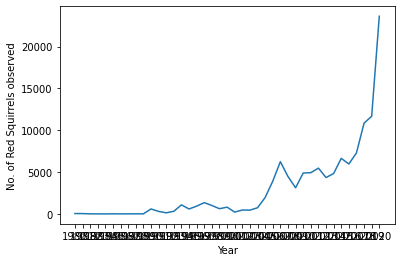

In [94]:
ax = sns.lineplot(x = "year_parsed", y = "individualCount", data=data)
ax.set(xlabel = "Year", ylabel="No. of Red Squirrels observed")


In [95]:
!pip install fbprophet

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [96]:
from fbprophet import Prophet

In [99]:
model = Prophet()
data.head()
data.reset_index(inplace = True)

In [100]:
data.head()


year_parsed  individualCount
0        1980             55.0
1        1981             49.0
2        1982             21.0
3        1983             14.0
4        1984             10.0

In [104]:
data.columns = ['ds', 'y']

ds
0 1980-01-01
1 1981-01-01
2 1982-01-01
3 1983-01-01
4 1984-01-01

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


ds         yhat   yhat_lower   yhat_upper
0 1980-01-01 -1869.782331 -7693.691202  3711.408107
1 1981-01-01 -3153.107541 -8483.737361  2424.511427
2 1982-01-01 -2391.635982 -7561.955045  3275.886165
3 1983-01-01 -1591.497335 -6785.918140  4267.319718
4 1984-01-01  -753.316443 -6929.709158  5072.617469

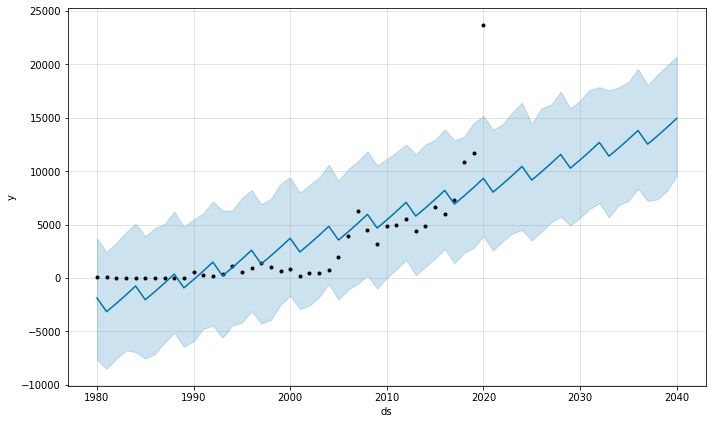

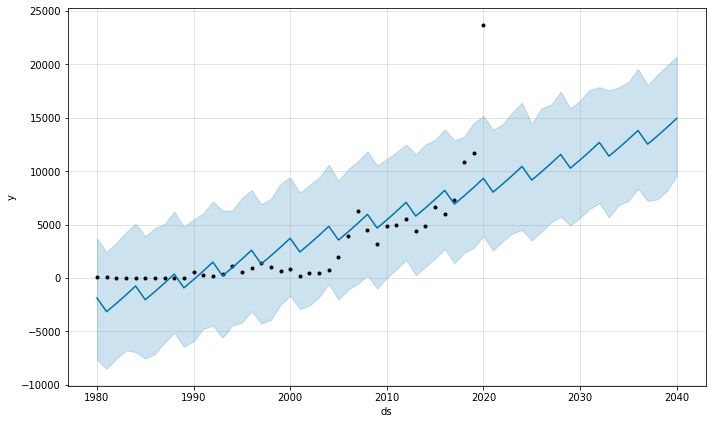

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


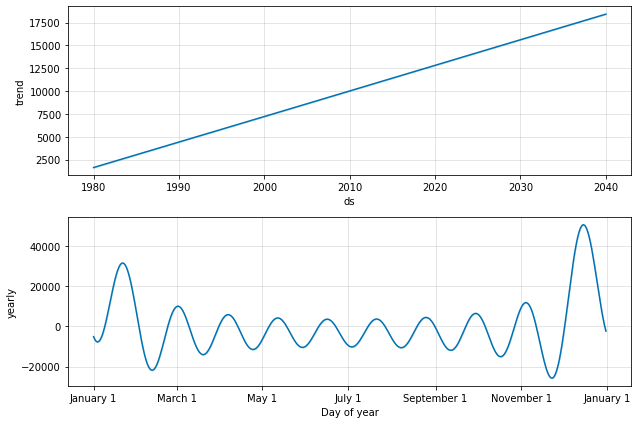

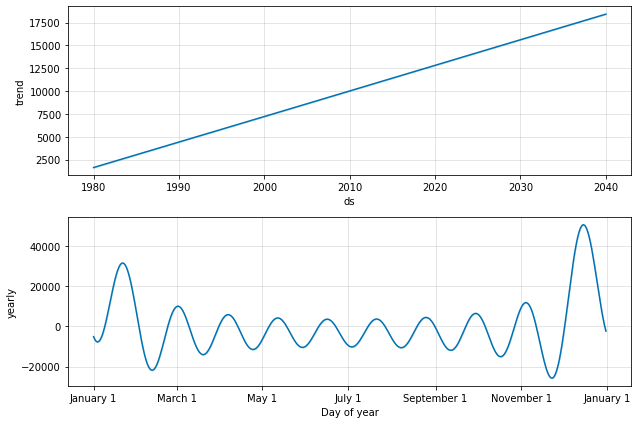

In [113]:
my_model.plot_components(forecast)

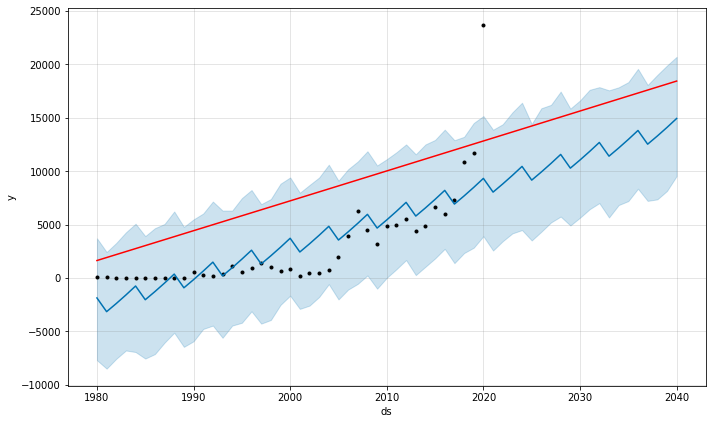

In [114]:
from fbprophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

In [150]:
rainfall = pd.read_csv('data/rainfall.csv')

In [151]:
rainfall.head()

rainfall = rainfall[rainfall["year"] >= 1980]
rainfall.head()

year    jan    feb    mar   apr   may    jun    jul    aug    sep    oct  \
144  1980  112.9   95.7  103.8  21.0  25.3  138.4  119.0  131.6  187.2  184.0   
145  1981  169.7   98.2  148.0  33.4  79.3   99.4   88.8   54.0  228.0  216.6   
146  1982  148.4  115.4  156.2  47.5  93.9   56.1   51.8  160.6  200.0  185.8   
147  1983  241.2   60.5  157.4  68.7  96.6   79.3   47.0   48.5  167.0  247.3   
148  1984  216.7  109.7  102.0  62.0  23.3   66.8   53.6   50.4  164.4  212.2   

       nov    dec    win    spr    sum    aut     ann  
144  178.5  221.6  401.9  150.1  389.1  549.8  1519.2  
145  234.9   78.5  489.4  260.7  242.2  679.5  1528.7  
146  224.9  206.5  342.2  297.5  268.5  610.6  1646.9  
147   54.4  227.3  508.2  322.7  174.8  468.7  1495.3  
148  230.8  164.5  553.7  187.3  170.9  607.4  1456.3

In [152]:
rainfall = rainfall.rename(columns={"year": "ds"})

In [153]:
rainfall.head()

ds    jan    feb    mar   apr   may    jun    jul    aug    sep    oct  \
144  1980  112.9   95.7  103.8  21.0  25.3  138.4  119.0  131.6  187.2  184.0   
145  1981  169.7   98.2  148.0  33.4  79.3   99.4   88.8   54.0  228.0  216.6   
146  1982  148.4  115.4  156.2  47.5  93.9   56.1   51.8  160.6  200.0  185.8   
147  1983  241.2   60.5  157.4  68.7  96.6   79.3   47.0   48.5  167.0  247.3   
148  1984  216.7  109.7  102.0  62.0  23.3   66.8   53.6   50.4  164.4  212.2   

       nov    dec    win    spr    sum    aut     ann  
144  178.5  221.6  401.9  150.1  389.1  549.8  1519.2  
145  234.9   78.5  489.4  260.7  242.2  679.5  1528.7  
146  224.9  206.5  342.2  297.5  268.5  610.6  1646.9  
147   54.4  227.3  508.2  322.7  174.8  468.7  1495.3  
148  230.8  164.5  553.7  187.3  170.9  607.4  1456.3

In [117]:
data.head()

ds     y
0  1980  55.0
1  1981  49.0
2  1982  21.0
3  1983  14.0
4  1984  10.0

In [144]:
data.dtypes

ds     object
y     float64
dtype: object

In [154]:
rainfall.dtypes

ds       int64
jan    float64
feb    float64
mar    float64
apr    float64
may    float64
jun    float64
jul    float64
aug    float64
sep    float64
oct    float64
nov    float64
dec    float64
win     object
spr    float64
sum    float64
aut    float64
ann    float64
dtype: object

In [155]:
rainfall['ds'] = pd.to_datetime(rainfall['ds'], format = '%Y')

In [156]:
rainfall['ds'] = rainfall['ds'].dt.strftime('%Y')

In [157]:
all_data = data.merge(rainfall, on="ds", how="left")

In [158]:
all_data.head()

ds     y    jan    feb    mar   apr   may    jun    jul    aug    sep  \
0  1980  55.0  112.9   95.7  103.8  21.0  25.3  138.4  119.0  131.6  187.2   
1  1981  49.0  169.7   98.2  148.0  33.4  79.3   99.4   88.8   54.0  228.0   
2  1982  21.0  148.4  115.4  156.2  47.5  93.9   56.1   51.8  160.6  200.0   
3  1983  14.0  241.2   60.5  157.4  68.7  96.6   79.3   47.0   48.5  167.0   
4  1984  10.0  216.7  109.7  102.0  62.0  23.3   66.8   53.6   50.4  164.4   

     oct    nov    dec    win    spr    sum    aut     ann  
0  184.0  178.5  221.6  401.9  150.1  389.1  549.8  1519.2  
1  216.6  234.9   78.5  489.4  260.7  242.2  679.5  1528.7  
2  185.8  224.9  206.5  342.2  297.5  268.5  610.6  1646.9  
3  247.3   54.4  227.3  508.2  322.7  174.8  468.7  1495.3  
4  212.2  230.8  164.5  553.7  187.3  170.9  607.4  1456.3

In [177]:
my_model = Prophet(interval_width=0.95)


In [178]:
my_model.add_regressor("ann")

In [179]:
my_model.fit(all_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -58.7873
Iteration  1. Log joint probability =    18.8062. Improved by 77.5935.
Iteration  2. Log joint probability =    31.3729. Improved by 12.5668.
Iteration  3. Log joint probability =    56.0882. Improved by 24.7153.
Iteration  4. Log joint probability =    65.2022. Improved by 9.11394.
Iteration  5. Log joint probability =    65.3539. Improved by 0.15176.
Iteration  6. Log joint probability =    65.4931. Improved by 0.139159.
Iteration  7. Log joint probability =    65.5135. Improved by 0.0203614.
Iteration  8. Log joint probability =    65.5476. Improved by 0.0341202.
Iteration  9. Log joint probability =    65.6266. Improved by 0.0789793.
Iteration 10. Log joint probability =    65.6356. Improved by 0.0090123.
Iteration 11. Log joint probability =    65.6734. Improved by 0.0377957.
Iteration 12. Log joint probability =    65.6791. Improved by 0.00569419.
Iteration 13. Log joint probability =    65.7665. Improved by 0.0874668.
Iteration 14. Log jo

In [193]:
ann = all_data["ann"]
future_dates["ann"] = all_data["ann"].values

ValueError: Length of values (41) does not match length of index (61)

In [191]:
future_dates.head()

ds
0 1980-01-01
1 1981-01-01
2 1982-01-01
3 1983-01-01
4 1984-01-01

In [192]:
future_dates = my_model.make_future_dataframe(periods=20, freq="YS")
future_dates.head()


ds
0 1980-01-01
1 1981-01-01
2 1982-01-01
3 1983-01-01
4 1984-01-01

In [190]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ValueError: Regressor 'ann' missing from dataframe

In [169]:
my_model.fit(all_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -58.7873
Iteration  1. Log joint probability =    18.8062. Improved by 77.5935.
Iteration  2. Log joint probability =    31.3729. Improved by 12.5668.
Iteration  3. Log joint probability =    56.0882. Improved by 24.7153.
Iteration  4. Log joint probability =    65.2022. Improved by 9.11394.
Iteration  5. Log joint probability =    65.3539. Improved by 0.15176.
Iteration  6. Log joint probability =    65.4931. Improved by 0.139159.
Iteration  7. Log joint probability =    65.5135. Improved by 0.0203614.
Iteration  8. Log joint probability =    65.5476. Improved by 0.0341202.
Iteration  9. Log joint probability =    65.6266. Improved by 0.0789793.
Iteration 10. Log joint probability =    65.6356. Improved by 0.0090123.
Iteration 11. Log joint probability =    65.6734. Improved by 0.0377957.
Iteration 12. Log joint probability =    65.6791. Improved by 0.00569419.
Iteration 13. Log joint probability =    65.7665. Improved by 0.0874668.
Iteration 14. Log j

oint probability =    65.9457. Improved by 0.000175409.
Iteration 42. Log joint probability =    65.9459. Improved by 0.000125117.
Iteration 43. Log joint probability =    65.9459. Improved by 2.87045e-05.
Iteration 44. Log joint probability =    65.9459. Improved by 1.75476e-05.
Iteration 45. Log joint probability =     65.946. Improved by 0.000122364.
Iteration 46. Log joint probability =     65.946. Improved by 1.31821e-05.
Iteration 47. Log joint probability =    65.9461. Improved by 2.21077e-05.
Iteration 48. Log joint probability =    65.9461. Improved by 6.25212e-05.
Iteration 49. Log joint probability =    65.9462. Improved by 6.58965e-05.
Iteration 50. Log joint probability =    65.9462. Improved by 2.09988e-05.
Iteration 51. Log joint probability =    65.9462. Improved by 2.03067e-05.
Iteration 52. Log joint probability =    65.9462. Improved by 4.77865e-06.
Iteration 53. Log joint probability =    65.9463. Improved by 1.00485e-05.
Iteration 54. Log joint probability =    65.

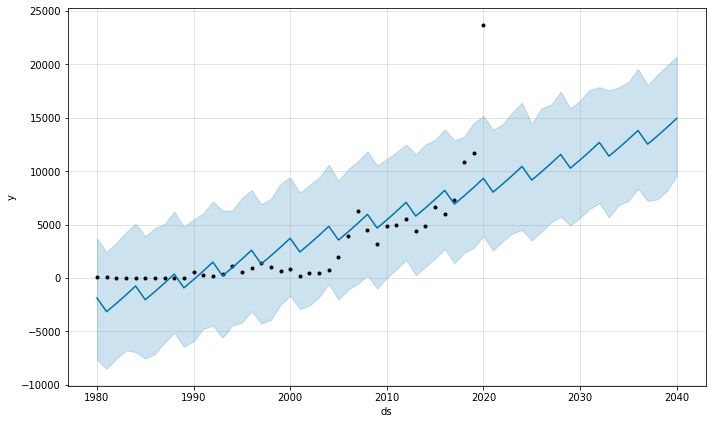

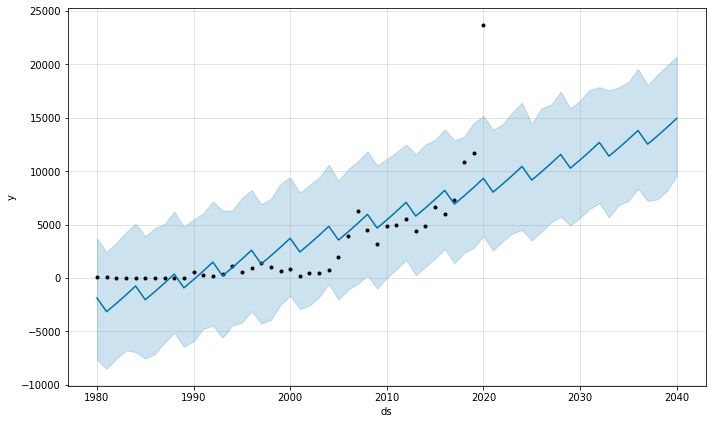

In [170]:
my_model.plot(forecast, uncertainty=True)

#### Image references:
Red squirrel: https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Squirrel_posing.jpg/1200px-Squirrel_posing.jpg
Crossbill: https://ichef.bbci.co.uk/news/976/cpsprodpb/0EF1/production/_99052830_scottishcrossbill.jpg
